<a href="https://colab.research.google.com/github/MK316/Practice/blob/main/GNU_Session2_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AI, Digital Literacy, and Convergence Education: Connecting Humanities and Technology

##자연어처리와 디지털인문학 따라하기

###Junkyu Lee (Hankuk University of Foreign Studies)

In [1]:
#@markdown Introduction Slides (1~8)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.01.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.03.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.02.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.05.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.04.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.06.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.07.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.08.JPG"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 9)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

#Let's start with Python
##Preprocessing examples

❤️ 슬라이드 2개임, 번호수정

In [2]:
#@markdown Preprocess & Python library Slides (9~11)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.17.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.18.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.11.JPG"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 4)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

In [3]:
#@markdown Import/Install relevant packages
import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
#@markdown "The rain in Spain falls mainly on the plain." 전처리
text = "The rain in Spain falls mainly on the plain."
doc = nlp(text)

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.is_stop)

import pandas as pd

cols = ("text", "lemma", "POS", "explain", "stopword")
rows = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows.append(row)

df = pd.DataFrame(rows, columns=cols)
    
df

The the DET True
rain rain NOUN False
in in ADP True
Spain Spain PROPN False
falls fall VERB False
mainly mainly ADV False
on on ADP True
the the DET True
plain plain NOUN False
. . PUNCT False


,text,lemma,POS,explain,stopword
0,The,the,DET,determiner,True
1,rain,rain,NOUN,noun,False
2,in,in,ADP,adposition,True
3,Spain,Spain,PROPN,proper noun,False
4,falls,fall,VERB,verb,False
5,mainly,mainly,ADV,adverb,False
6,on,on,ADP,adposition,True
7,the,the,DET,determiner,True
8,plain,plain,NOUN,noun,False
9,.,.,PUNCT,punctuation,False


In [5]:
#@markdown Sentence 시각화
from spacy import displacy

displacy.render(doc, style="dep", jupyter=True)

# Topic modeling w/ 미국 대통령 연설문

❤️ 슬라이드 2개임, 번호수정

In [8]:
#@markdown LDA Slides (9~11)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.09.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.10.JPG"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(9, 11)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

### Downloading necessary files

* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012

[Topic modeling 실습파일](https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv)

❤️ NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968 (맥에서 돌리면 에러나는 듯. 에러가지고 gpt한테 물어보면 해결방법 알려줌) 이 에러 때문에 아래 세 개의 코드가 이어서 안돌아가게 됨. 윈도우즈에서 했는데 동일한 에러나옴. 아래 코드로 변경하여 파일을 불러오면 문제해결됨.

In [2]:
# [김미란] 아래 코드 대체
import os
import requests

# Make data directory if it doesn't exist
os.makedirs("data", exist_ok=True)

# Download the CSV file
url = "https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv"
response = requests.get(url)

# Save the content to a file
with open("data/state-of-the-union.csv", "wb") as f:
    f.write(response.content)


In [11]:
#@markdown Download the csv file ❤️
# Make data directory if it doesn't exist

!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data

NotImplementedError: ignored

In [3]:
#@markdown Covert csv to Pandas & data cleaning
import pandas as pd
df = pd.read_csv("data/state-of-the-union.csv")
# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")
df.head()

<ipython-input-3-5d4042a3feb4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


 ❤️ wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=36, contour_color='steelblue', width = 800, height=600)

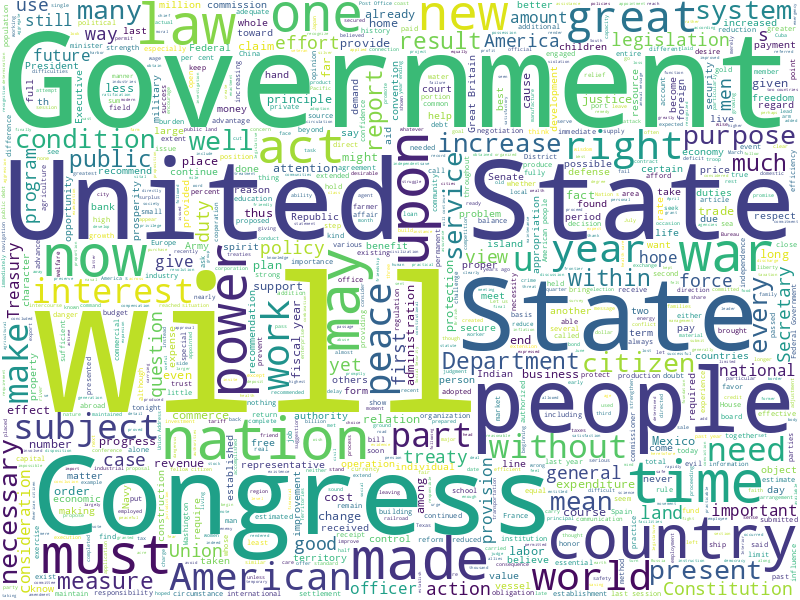

In [4]:
#@markdown Explore data w/ wordcloud
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.content.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=36, contour_color='steelblue', width = 800, height=600)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## Prepare data for LDA (Latent Dirichlet Allocation; 잠재 디리클레할당)
###gensim.utils.simple_preprocess convert a document into a list of tokens. This lowercases, tokenizes, de-accents (optional)

In [5]:
#@markdown gensim의 simple_preprocess 이용한 토큰화
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
df.content = df.content.apply(simple_preprocess)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#@markdown stopwords 제거
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'to']) # add more if want
df.content = df.content.apply(lambda words: [word for word in words if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
#@markdown 토큰화 > 카운트벡터 (BOW형태로 변환) 형태인 corpus 생성; 첫번째 결과 확인 ❤️ set display limit (200 > 20) Last line
texts = df.content #Gensim에서는 토큰화된 결과를 texts로 지정해야 함
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5) #출현한 문서 빈도수가 낮거나 (문서에서 5번 이하) or 높은 단어들 (0.5 -> 50%이상) 제외 
corpus = [dictionary.doc2bow(text) for text in texts] #doc2bow() >> 토큰화된 결과를 카운트 벡터, 즉 BOW형태로 변환; Gensim에서는 doc2bow()의 결과를 corpus로 지정해야 함
corpus[0][:20]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1)]

In [10]:
#@markdown 카운트 벡터형태의 corpus를 TF-IDF로 변환; 첫 번째 결과 확인 ❤️ 여기도 마지막 20개만 보여주기??
from gensim import models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
corpus_tfidf[0][-20:]

[(182, 0.11569544335266337),
 (183, 0.03345716487176589),
 (184, 0.08396611168035908),
 (185, 0.02788990694521304),
 (186, 0.061739983955738154),
 (187, 0.09888327011925634),
 (188, 0.0426229433218899),
 (189, 0.032269802228782236),
 (190, 0.048936377415776125),
 (191, 0.06453960445756447),
 (192, 0.0636122246503216),
 (193, 0.09392797157424708),
 (194, 0.10466802191811966),
 (195, 0.02493406458573687),
 (196, 0.02823446717801553),
 (197, 0.05223678000805479),
 (198, 0.061739983955738154),
 (199, 0.029289209153612196),
 (200, 0.11569544335266337),
 (201, 0.02621673039673532)]

In [11]:
#LDA(잠재 디리클레할당) 실행; 토픽수 = 15개 지정
from gensim import models
n_topics = 15
lda_model = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=n_topics)

In [12]:
lda_model.print_topics()

[(0,
  '0.001*"mexico" + 0.001*"programs" + 0.001*"program" + 0.000*"spending" + 0.000*"communist" + 0.000*"mexican" + 0.000*"help" + 0.000*"cuba" + 0.000*"kansas" + 0.000*"coinage"'),
 (1,
  '0.001*"program" + 0.001*"programs" + 0.001*"today" + 0.001*"tonight" + 0.001*"cable" + 0.001*"billion" + 0.001*"help" + 0.001*"farm" + 0.000*"cannot" + 0.000*"budget"'),
 (2,
  '0.000*"interstate" + 0.000*"embargo" + 0.000*"decrees" + 0.000*"suspension" + 0.000*"forest" + 0.000*"industrial" + 0.000*"railroads" + 0.000*"tonight" + 0.000*"solicit" + 0.000*"slavery"'),
 (3,
  '0.001*"democracy" + 0.001*"tonight" + 0.000*"depression" + 0.000*"help" + 0.000*"banks" + 0.000*"budget" + 0.000*"recovery" + 0.000*"iraq" + 0.000*"americans" + 0.000*"cent"'),
 (4,
  '0.001*"soviet" + 0.001*"militia" + 0.001*"communist" + 0.000*"program" + 0.000*"gentlemen" + 0.000*"enemy" + 0.000*"loan" + 0.000*"jobs" + 0.000*"fighting" + 0.000*"rulers"'),
 (5,
  '0.001*"mexico" + 0.001*"texas" + 0.001*"budget" + 0.001*"prog

In [13]:
#@markdown LDA결과 시각화 ❤️ 분리했으면 함. (인스톨과정은 안보이도록)
!pip install pyLDAvis
!pip install "pandas<2.0.0" 

import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatibl

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.002009  0.003835       1        1  35.846795
1      0.010533 -0.001526       2        1  24.133165
14    -0.004396  0.010847       3        1  23.340134
7     -0.005576 -0.001966       4        1   7.258624
4      0.007191  0.006768       5        1   3.293498
13     0.001913 -0.001795       6        1   1.320468
12    -0.001187  0.001264       7        1   1.298793
6     -0.006324 -0.002016       8        1   1.108851
3      0.003817 -0.004073       9        1   0.634026
11    -0.001053 -0.000091      10        1   0.525295
9     -0.000591 -0.004303      11        1   0.435888
5      0.002181  0.000676      12        1   0.386724
8     -0.003074 -0.004636      13        1   0.207451
0      0.000677 -0.001827      14        1   0.184998
2     -0.002103 -0.001158      15        1   0.025290, topic_info=           Term        Freq       Total Category  logprob  loglift
9232    tonight  216.000000  216.000000  Default  30.0000  30.0000
8694    program  199.000000  199.000000  Default  29.0000  29.0000
7376       help  152.000000  152.000000  Default  28.0000  28.0000
2730  americans  173.000000  173.000000  Default  27.0000  27.0000
8394     budget  157.000000  157.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
9232    tonight    0.029745  216.097861  Topic15  -8.1410  -0.6083
8694    program    0.029140  199.715925  Topic15  -8.1615  -0.5500
8073      today    0.028019  166.598479  Topic15  -8.2007  -0.4079
2289  ministers    0.025410   65.846051  Topic15  -8.2985   0.4226
3975      slave    0.025230   63.619928  Topic15  -8.3056   0.4499

[944 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1758      1  0.219341  academy
1758      2  0.219341  academy
1758      3  0.239281  academy
1758      4  0.219341  academy
1758      5  0.039880  academy
...     ...       ...      ...
8975      5  0.016054      yes
8975      6  0.016054      yes
8975      7  0.016054      yes
8975      8  0.016054      yes
8975      9  0.016054      yes

[4523 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 2, 15, 8, 5, 14, 13, 7, 4, 12, 10, 6, 9, 1, 3])

❤️ 번호나 아이콘으로 구별하면 좋겠음. (큰제목)

#Sentiment Analysis (w/ Harry Potter)

❤️ 슬라이드 어려워보임, 슬라이드 번호 변경

In [14]:
#@markdown Intro Slides (12~14)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.12.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.13.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.14.JPG"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 4)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 분석할 자료 준비

[Harry Potter 자료를 공유한 깃허브 사이트](https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git)

❤️ 링크를 자료가 보이게 바꾸면 어떨까 함. 또는 자료링크를 추가
https://github.com/ErikaJacobs/Harry-Potter-Text-Mining/blob/master/Book%20Text/HPBook1.txt

In [15]:
#@markdown Harry Potter자료 가져오기
!git clone https://github.com/ErikaJacobs/Harry-Potter-Text-Mining.git

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'Harry-Potter-Text-Mining'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 109 (delta 0), reused 0 (delta 0), pack-reused 106
Receiving objects: 100% (109/109), 13.39 MiB | 9.98 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [16]:
#@markdown Pandas이용 데이터 정리; 책의 한 챕터가 한 셀에 있는 상태
import pandas as pd #Importing Pandas package
%cd /content/Harry-Potter-Text-Mining/Book Text

import glob 
fns = glob.glob('*.txt')
df = pd.DataFrame()
for fn in fns:
  dftmp = pd.read_csv(fn, sep="@")
  df = pd.concat([df, dftmp])

%cd /content

df

/content/Harry-Potter-Text-Mining/Book Text
/content


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,Chapter,Book
0,"THE BOY WHO LIVED Mr. and Mrs. Dursley, of nu...",1,1
1,THE VANISHING GLASS Nearly ten years had pass...,2,1
2,THE LETTERS FROM NO ONE The escape of the Bra...,3,1
3,THE KEEPER OF THE KEYS BOOM. They knocked aga...,4,1
4,DIAGON ALLEY Harry woke early the next mornin...,5,1
...,...,...,...
17,"MOONY, WORMTAIL, PADDFOOT, AND PRONGS It to...",18,3
18,THE SERVANT OF LORD VOLDEMORT Hermione scre...,19,3
19,THE DEMENTOR'S KISS Harry had never been pa...,20,3
20,HERMIONE'S SECRET Shocking business... shoc...,21,3


In [17]:
#@markdown 데이터 전처리 Stopwords제거
import nltk #Import NLTK library
nltk.download('stopwords')
nltk.download('punkt') #installed punkt to fix error
from nltk import word_tokenize
from nltk.corpus import stopwords #Import stopwords to Python

stopwords = set(stopwords.words('english')) #English stopwords assigned to "stopwords" object

import string #Punctuation

# Function for removing punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

stopwords = [''.join(item for item in x if item not in string.punctuation) for x in stopwords] #Remove punctuation from stopwords

df['WordCountText']=df['Text'].str.lower().apply(remove_punctuations).apply(word_tokenize) # Word Count Text
# Word Count
df['WordCloudText']=df['WordCountText'].apply(lambda x: [word for word in x if word not in stopwords]) # Word Cloud Text
df['WordCount'] = df['WordCountText'].str.len() #Word Count Per Chapter

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
#@markdown 데이터 전처리: 책 > 문장단위로 (챕터가 문장단위로 나뉜 상태)
# Creating a table breaking down the text by each sentence, rather than each chapter.
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem import PorterStemmer

# Make smaller table - reset index to prepare for further work
dfsentiment = df[['Book','Chapter','Text']].reset_index() \
    .drop(["index"], axis=1)
dfsentiment = dfsentiment.join(dfsentiment.Text.apply(sent_tokenize).rename('Sentences')) # Breaking apart text into sentences

#Put every tokenized sentence into its own row
dfsentiment2 = dfsentiment.Sentences.apply(pd.Series) \
    .merge(dfsentiment, left_index = True, right_index = True) \
    .drop(["Text"], axis = 1) \
    .drop(["Sentences"], axis = 1) \
    .melt(id_vars = ['Book', 'Chapter'], value_name = "Sentence") \
    .drop("variable", axis = 1) \
    .dropna()

# Sort new table by Book and Chapter - reset index to reflect new order
dfsentiment2=dfsentiment2.sort_values(by=['Book', 'Chapter']) \
    .reset_index() \
    .drop(['index'], axis = 1)

# Clean punctuation, lower case
dfsentiment2['Sentence']=dfsentiment2.Sentence.apply(remove_punctuations).apply(lambda x: x.lower()) \

# Check first five values
dfsentiment2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Book,Chapter,Sentence
0,1,1,the boy who lived mr and mrs dursley of numbe...
1,1,1,they were the last people youd expect to be in...
2,1,1,mr dursley was the director of a firm called g...
3,1,1,he was a big beefy man with hardly any neck al...
4,1,1,mrs dursley was thin and blonde and had nearly...
...,...,...,...
70979,7,37,the train began to more and harry walked along...
70980,7,37,harry kept smiling and waving even though it w...
70981,7,37,the train rounded a corner
70982,7,37,harrys hand was still raised in farewellhell b...


##감정분석 실행

In [19]:
#@markdown Bring in VADER library & Sentiment Intensity Analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sid=nltk.sentiment.vader.SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


❤️ 사례를 들어 positive, negative, neutral이 무엇을 가리키는지 보여주면 좋겠음. (슬라이드 한두개?)

In [20]:
#@markdown 문장별로 감정분석 점수 부여; Compound, positive, negative, neutral 
# Get intensity scores of each sentence
dfsentiment2['Score']=dfsentiment2.Sentence.apply(lambda x: sid.polarity_scores(x))

# Place scores in own columns
dfsentiment2['CompScore']=dfsentiment2.Score.apply(lambda x: x.get("compound"))
dfsentiment2['PosScore']=dfsentiment2.Score.apply(lambda x: x.get("pos"))
dfsentiment2['NegScore']=dfsentiment2.Score.apply(lambda x: x.get("neg"))
dfsentiment2['NeuScore']=dfsentiment2.Score.apply(lambda x: x.get("neu"))

# With scores extracted, the original score field can be removed
dfsentiment2 = dfsentiment2.drop(["Score"], axis=1)

# Adding Sentiment Flags
dfsentiment2['PosFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment2['NegFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment2['NeuFlag'] = dfsentiment2.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
dfsentiment2.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Book,Chapter,Sentence,CompScore,PosScore,NegScore,NeuScore,PosFlag,NegFlag,NeuFlag
0,1,1,the boy who lived mr and mrs dursley of numbe...,0.8779,0.335,0.000,0.665,1,0,0
1,1,1,they were the last people youd expect to be in...,-0.5423,0.000,0.176,0.824,0,1,0
2,1,1,mr dursley was the director of a firm called g...,0.0000,0.000,0.000,1.000,0,0,1
3,1,1,he was a big beefy man with hardly any neck al...,0.0000,0.000,0.000,1.000,0,0,1
4,1,1,mrs dursley was thin and blonde and had nearly...,0.4927,0.084,0.000,0.916,1,0,0
5,1,1,the dursleys had a small son called dudley and...,-0.2960,0.000,0.121,0.879,0,1,0
6,1,1,the dursleys had everything they wanted but th...,0.3612,0.199,0.148,0.653,1,0,0
7,1,1,they didnt think they could bear it if anyone ...,0.0000,0.000,0.000,1.000,0,0,1
8,1,1,mrs potter was mrs dursleys sister but they ha...,0.0000,0.000,0.000,1.000,0,0,1
9,1,1,the dursleys shuddered to think what the neigh...,0.0000,0.000,0.000,1.000,0,0,1


In [22]:
dfsentiment2.groupby('Book').mean()['CompScore']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-22-83515664a9e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsentiment2.groupby('Book').mean()['CompScore']


Book
1    0.019829
2    0.002223
3    0.005590
4    0.012213
5    0.007200
6    0.024172
7   -0.031744
Name: CompScore, dtype: float64

❤️ 이 부분은 플랏으로 보여주면 좋을 듯.

In [23]:
#@markdown 긍정, 부정, 중립의 문장 수 확인
print('There are', dfsentiment2['PosFlag'].sum(), "positive sentences,", \
      dfsentiment2['NegFlag'].sum(), "negative sentences, and", \
      dfsentiment2['NeuFlag'].sum(), "neutral sentences")
print('This is a total of', \
      dfsentiment2['PosFlag'].sum()+dfsentiment2['NegFlag'].sum()+dfsentiment2['NeuFlag'].sum(), "sentences")

There are 19055 positive sentences, 18385 negative sentences, and 33544 neutral sentences
This is a total of 70984 sentences


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###visualization of sentiment analysis

❤️ 가로가 너무 길어서 변화라는 의미가 조금 실감나지 않음. 사이즈 변경하는 법 찾기 (0점도 선으로 표기하는 법?)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-726cd66cebfd>:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfsentiment2.groupby(['Chapter','BookTitle']).mean()['CompScore'].unstack().plot(ax=ax, subplots=True, ylim=(-0.25, 0.25), colormap=ColorMap)
<ipython-input-24-726cd66cebfd>:31: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfsentiment2.groupby(['Chapter','BookTitle']).mean()['CompScore'].unstack().plot(ax=ax, subp

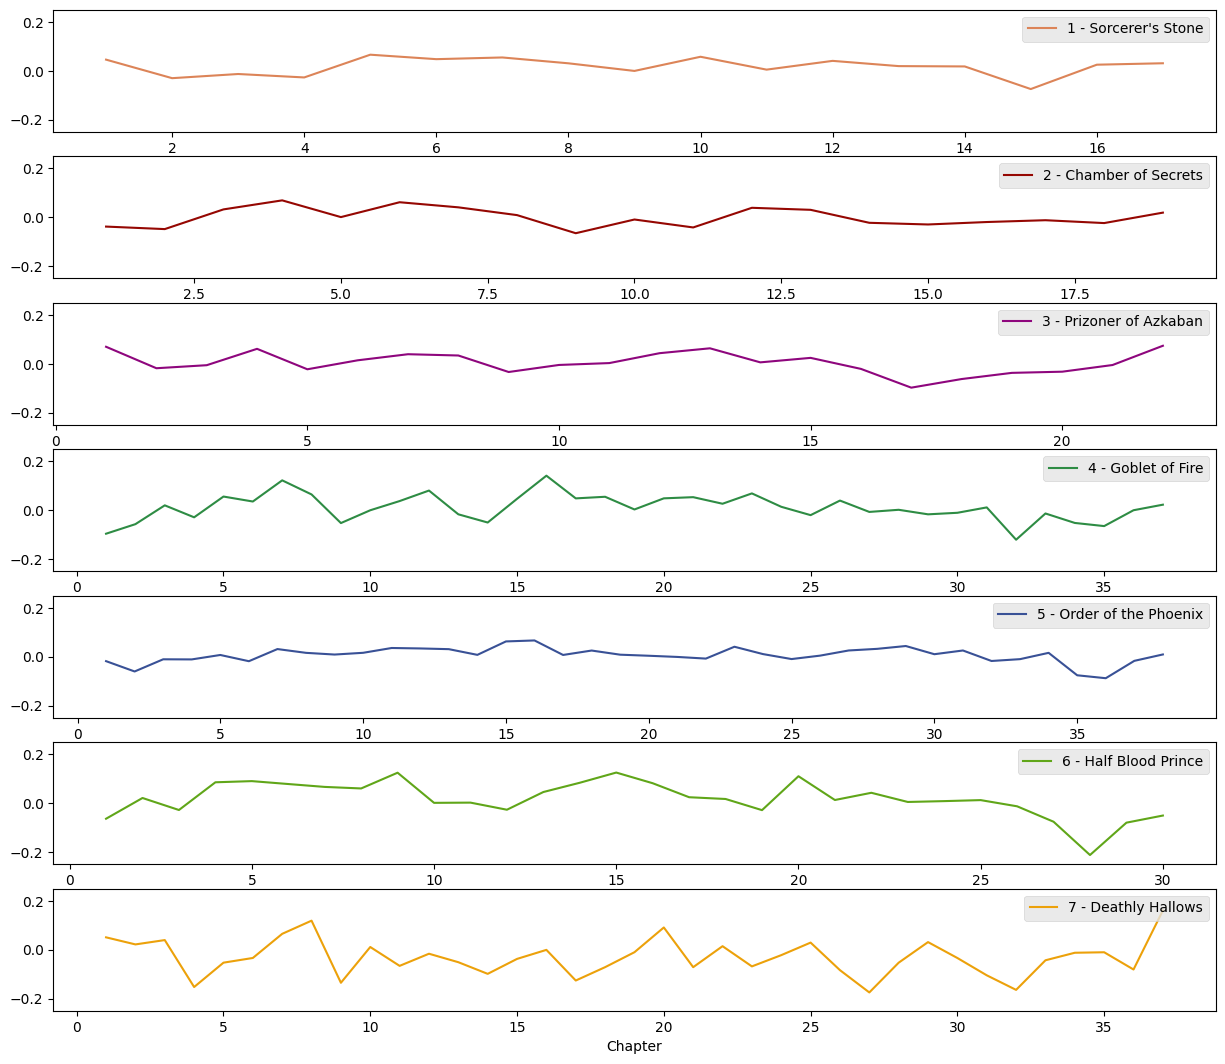

In [24]:
#@markdown How does the sentiment change during each chapter of each book over time?
#Time series of sentiments in 7 books of Harry Potter
def Titles(x):
    if x == 1:
        return "1 - Sorcerer's Stone"
    if x == 2:
        return "2 - Chamber of Secrets"
    if x == 3:
        return "3 - Prizoner of Azkaban"
    if x == 4:
        return "4 - Goblet of Fire"
    if x == 5:
        return "5 - Order of the Phoenix"
    if x == 6:
        return "6 - Half Blood Prince"
    if x == 7:
        return "7 - Deathly Hallows"

dfsentiment2['BookTitle']=dfsentiment2.Book.apply(lambda x: Titles(x))

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

colorsList = ['#DC8458', '#950702', '#8E067D', '#2E8C44', '#395196', '#60A619','#ECA10A'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# plot data
fig, ax = plt.subplots(figsize=(15,13))
# use unstack()
dfsentiment2.groupby(['Chapter','BookTitle']).mean()['CompScore'].unstack().plot(ax=ax, subplots=True, ylim=(-0.25, 0.25), colormap=ColorMap)
plt.style.use('ggplot')
ax.set_ylabel('Compound Sentiment Score')

[ax.legend(loc=1) for ax in plt.gcf().axes]

#Cluster analysis w/ movie reviews

In [25]:
#@markdown CA intro Slides (15~16)
from IPython.display import display
import ipywidgets as widgets
import requests

def on_button_click(button):
    sn = int(button.description) - 1
    image.value = requests.get(urls[sn]).content

urls = ["https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.15.JPG",
        "https://raw.githubusercontent.com/junkyuhufs/Practice/main/slide.16.JPG"
]

button_layout = widgets.Layout(width='50px', height='30px')

buttons = [widgets.Button(description=str(i), layout=button_layout) for i in range(1, 3)]
for button in buttons:
    button.on_click(on_button_click)

image = widgets.Image(value=requests.get(urls[0]).content, width="700", height="600")

display(widgets.HBox([image, widgets.VBox(buttons)]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


❤️ 가리고 위로 올리면 좋을 듯

In [26]:
#@markdown Import/Install relevant packages
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
!pip install mpld3
import mpld3
import requests

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 10.5 MB/s eta 0:00:00


##movie reviews자료 준비하기

❤️ 요기 텍스트셀 정리필요 + 싸인으로 하나의 셀에 합치기

[titles](https://raw.githubusercontent.com/brandomr/document_cluster/master/title_list.txt)

[genres](https://raw.githubusercontent.com/brandomr/document_cluster/master/genres_list.txt)

[synopses(wiki)](https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_wiki.txt)

[synopses(imdb)](https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_imdb.txt)

In [27]:
#@markdown 사이트에서 상위 100개의 자료를 각각 가져오기
url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/title_list.txt"
titles = requests.get(url).text.split('\n')
titles = titles[:100]

url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/genres_list.txt"
genres = requests.get(url).text.split('\n')
genres = genres[:100]

url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_wiki.txt"
synopses_wiki = requests.get(url).text.split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]
# cleaning
synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki

url = "https://raw.githubusercontent.com/brandomr/document_cluster/master/synopses_list_imdb.txt"
synopses_imdb = requests.get(url).text.split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]
# cleaning
synopses_clean_imdb = []
for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    #strips html formatting and converts to unicode
    synopses_clean_imdb.append(text)
synopses_imdb = synopses_clean_imdb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#@markdown wiki와 imdb의 synopsis 합치기
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)
synopses[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' Plot  [edit]  [  [  edit  edit  ]  ]  \n  On the day of his only daughter\'s wedding, Vito Corleone hears requests in his role as the Godfather, the Don of a New York crime family. Vito\'s youngest son, Michael, in a Marine Corps uniform, introduces his girlfriend, Kay Adams, to his family at the sprawling reception. Vito\'s godson Johnny Fontane, a popular singer, pleads for help in securing a coveted movie role, so Vito dispatches his consigliere, Tom Hagen, to Los Angeles to influence the abrasive studio head, Jack Woltz. Woltz is unmoved until the morning he wakes up in bed with the severed head of his prized stallion.  On the day of his only daughter\'s wedding,   Vito Corleone  Vito Corleone   hears requests in his role as the Godfather, the   Don  Don   of a New York crime family. Vito\'s youngest son,   Michael  Michael  , in a   Marine Corps  Marine Corps   uniform, introduces his girlfriend,   Kay Adams  Kay Adams  , to his family at the sprawling reception. Vito\'s godson 

In [29]:
#@markdown 영화순위 저장
# generates index for each item in the corpora (in this case it's just rank) and I'll use this for scoring later
ranks = []
for i in range(0,len(titles)):
    ranks.append(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#@markdown 영화제목, 줄거리, 장르, 순위가 몇 개씩 들어왔는지 확인
print(str(len(titles)) + ' titles')
print(str(len(synopses)) + ' synopses')
print(str(len(genres)) + ' genres')
print(str(len(ranks)) + ' ranks')

100 titles
100 synopses
100 genres
100 ranks


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##data cleaning

In [31]:
#@markdown NLTK에서 stopwords와 stemmer 가져오기
# load nltk's English stopwords as variable called 'stopwords'
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#@markdown tokenize with stemming위한 함수 만들기
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


❤️ 에러남: NameError: name 'totalvocab_tokenized' is not defined

In [34]:
#@markdown Stemming한 함수적용하여 단어리스트 생성 및 확인
nltk.download('punkt')
totalvocab_stemmed = []
for i in synopses:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
vocab_frame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: ignored

## K-means clustering

In [35]:
#@markdown TF-IDF이용 벡터로 변환; 빈도가 너무 많거나 적은 것은 배제
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)
tfidf_matrix.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'he

(100, 563)

In [36]:
#@markdown TF-IDF에 이용된 단어리스트 확인
terms = tfidf_vectorizer.get_feature_names_out()
terms

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(["'d", "'s death", "'s father", "'s friend", "'s hous", "'s mother",
       'abandon', 'abl', 'accept', 'accid', 'accompani', 'accus', 'act',
       'action', 'actual', 'admit', 'afterward', 'ago', 'agre', 'air',
       'aliv', 'allow', 'alon', 'alreadi', 'alway', 'american', 'angri',
       'angrili', 'ani', 'announc', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appear', 'approach', 'area', 'argu', 'arm',
       'armi', 'arrang', 'arrest', 'arriv', 'ask', 'assign', 'assist',
       'assum', 'attack', 'attempt', 'attend', 'attent', 'attract',
       'audienc', 'avoid', 'away', 'bad', 'bar', 'bare', 'battl', 'beat',
       'becaus', 'becom', 'bed', 'beg', 'believ', 'best', 'better', 'big',
       'black', 'blow', 'board', 'bodi', 'book', 'boss', 'boy', 'break',
       'brief', 'bring', 'broken', 'brother', 'build', 'burn', 'busi',
       'buy', 'ca', "ca n't", 'camp', 'captain', 'captur', 'car', 'care',
       'career', 'carri', 'case', 'catch', 'caus', 'chanc',

In [37]:
#@markdown 코사인 유사도를 이용한 거리 계산
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 0.00000000e+00,  8.00539634e-01,  7.62813109e-01, ...,
         6.41312416e-01,  6.70578229e-01,  8.23926244e-01],
       [ 8.00539634e-01,  2.22044605e-16,  7.33477850e-01, ...,
         7.33117814e-01,  7.71609239e-01,  8.92974798e-01],
       [ 7.62813109e-01,  7.33477850e-01, -2.22044605e-16, ...,
         7.23806699e-01,  7.49489708e-01,  8.58673233e-01],
       ...,
       [ 6.41312416e-01,  7.33117814e-01,  7.23806699e-01, ...,
         0.00000000e+00,  4.50879024e-01,  9.17464687e-01],
       [ 6.70578229e-01,  7.71609239e-01,  7.49489708e-01, ...,
         4.50879024e-01,  1.11022302e-16,  8.68599864e-01],
       [ 8.23926244e-01,  8.92974798e-01,  8.58673233e-01, ...,
         9.17464687e-01,  8.68599864e-01, -2.22044605e-16]])

❤️ 위에 붙이는게 낫지 않을까요?

In [38]:
dist.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(100, 100)

In [ ]:
#@markdown 군집을 5개로 정하여 군집분석 ❤️ 이 부분은 따로 결과를 보여줄 필요없을 듯?
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
clusters

In [40]:
import pandas as pd
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': clusters, 'genre': genres }
frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'genre'])
frame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rank,title,cluster,genre
4,0,The Godfather,4,"[u' Crime', u' Drama']"
2,1,The Shawshank Redemption,2,"[u' Crime', u' Drama']"
2,2,Schindler's List,2,"[u' Biography', u' Drama', u' History']"
4,3,Raging Bull,4,"[u' Biography', u' Drama', u' Sport']"
4,4,Casablanca,4,"[u' Drama', u' Romance', u' War']"
...,...,...,...,...
1,95,Rebel Without a Cause,1,[u' Drama']
3,96,Rear Window,3,"[u' Mystery', u' Thriller']"
3,97,The Third Man,3,"[u' Film-Noir', u' Mystery', u' Thriller']"
3,98,North by Northwest,3,"[u' Mystery', u' Thriller']"


❤️

In [41]:
frame['cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4    31
3    28
1    21
2    15
0     5
Name: cluster, dtype: int64

❤️

In [42]:
grouped = frame['rank'].groupby(frame['cluster'])
grouped.mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cluster
0    54.800000
1    48.095238
2    47.866667
3    57.714286
4    42.967742
Name: rank, dtype: float64

❤️ NameError: name 'vocab_frame' is not defined

In [45]:
#@markdown 각 군집별 주요단어와 영화목록 확인
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

Multidimensional scaling (시각화를 위한 차원 축소 563 -> 2)

In [46]:
#@markdown 관련 package불러온 후 MDS실행
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
xs, ys = pos[:, 0], pos[:, 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


❤️ 이름 정하고 각 키워드로 대표되는 이미지가 무엇인지 포스터로 같이 본 후에 시각화로 넘어가는 게 좋지 않을까요?

In [47]:
#@markdown 군집의 색깔과 이름 지정
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Family, home, war', 
                 1: 'Police, killed, murders', 
                 2: 'Father, New York, brothers', 
                 3: 'Dance, singing, love', 
                 4: 'Killed, soldiers, captain'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


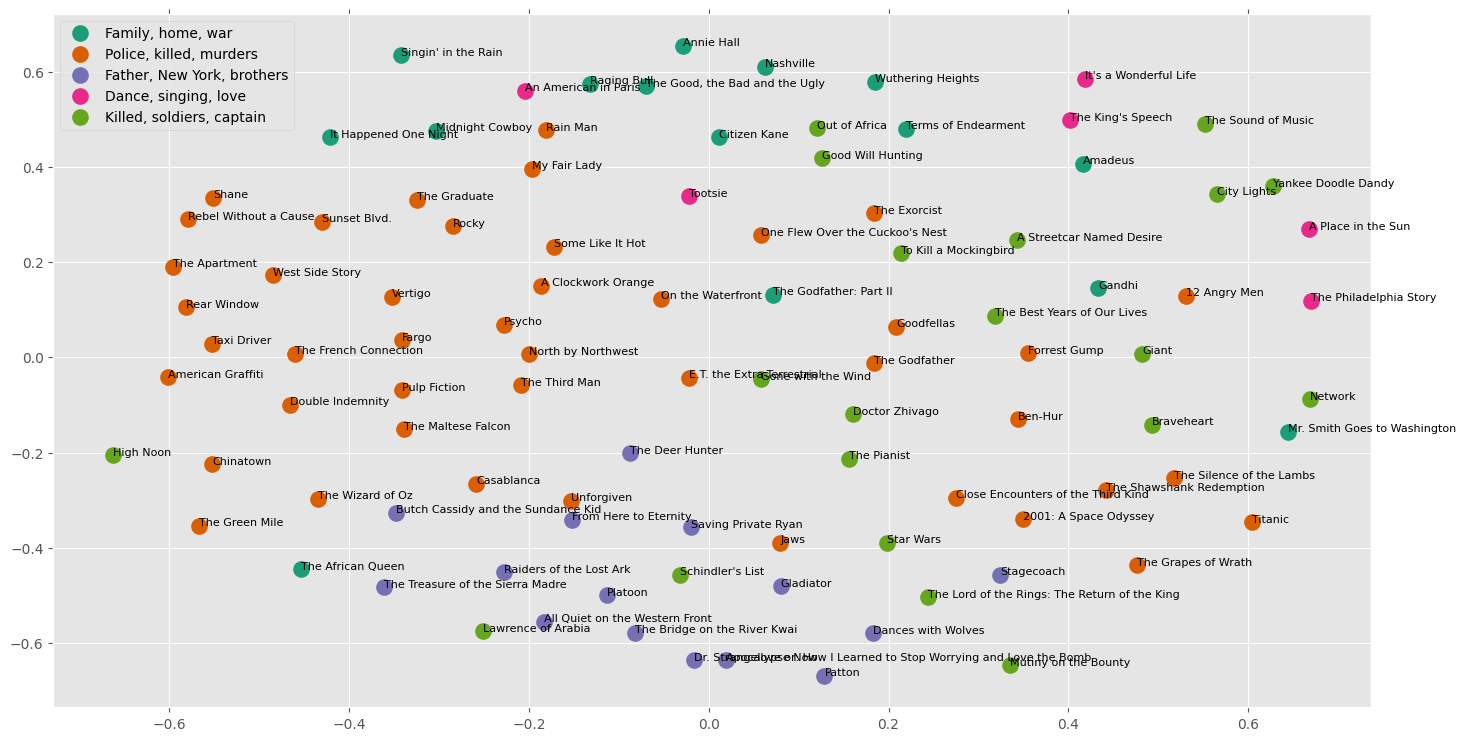

In [48]:
#@markdown MDS시각화
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)
    
plt.show() #show the plot

##Hierarchical document clustering(dendrogram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


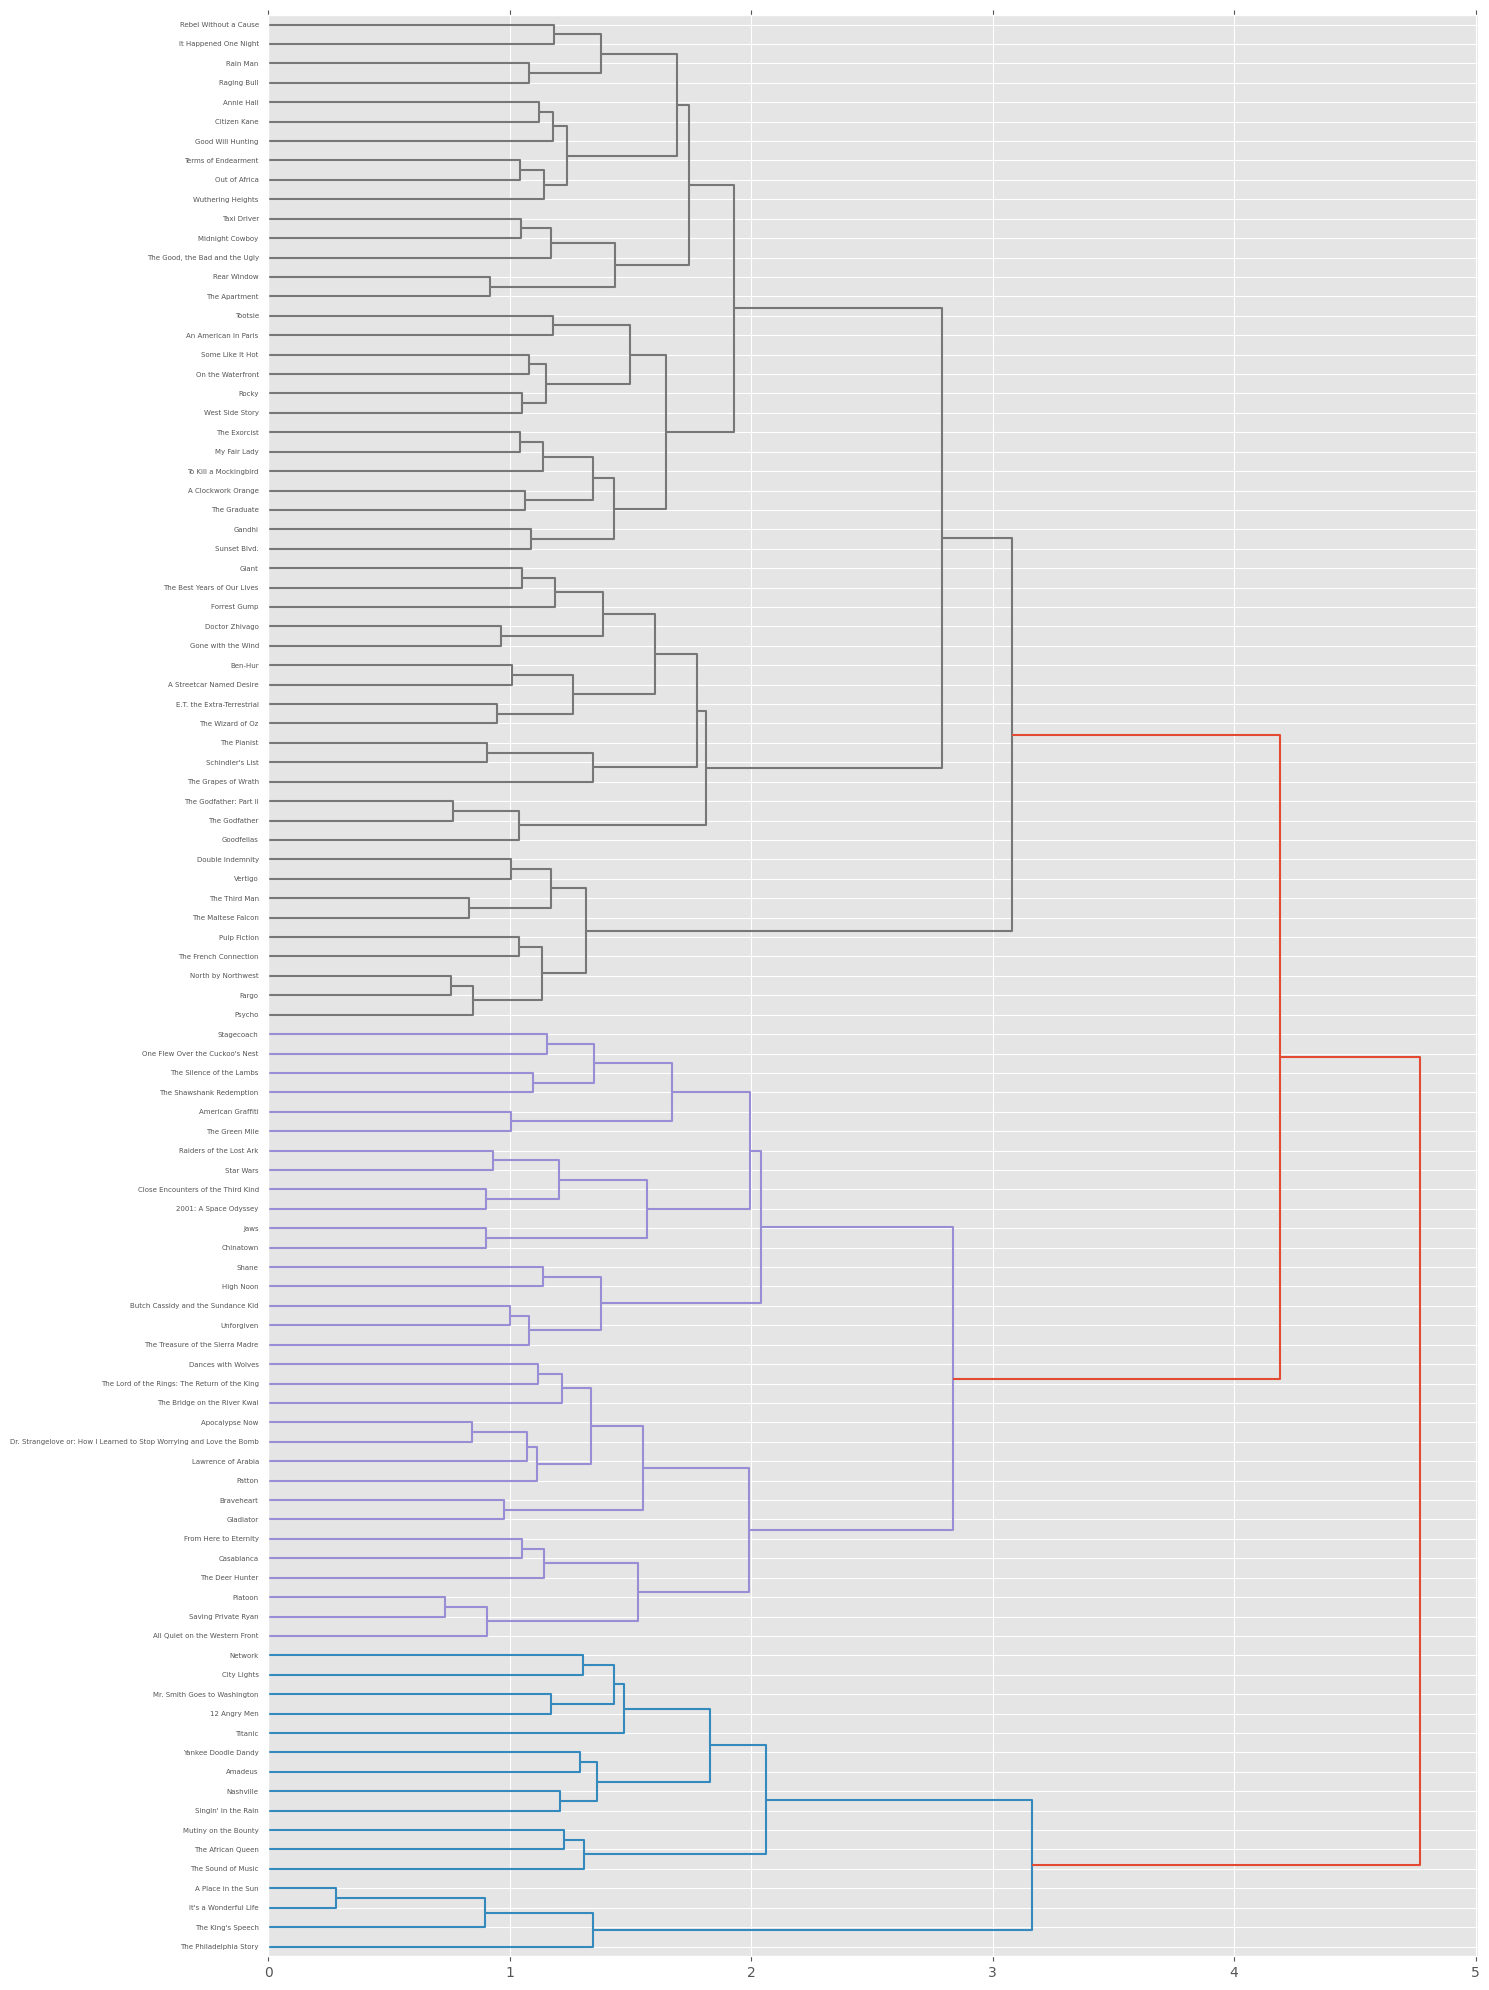

In [49]:
#@markdown Dendrogram을 이용한 시각화
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances
fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);
plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')
plt.tight_layout() #show plot with tight layout

❤️ 이러한 분석으로 뭘하는지?? (넷플릭스, 음악 등의 추천 알로리즘?)